In [1]:
%matplotlib inline
import matplotlib.pyplot as plot
import seaborn
from pandas.tools.plotting import scatter_matrix
from math import log

import jupynbimp
import merge_all_data

/opt/conda/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


importing Jupyter notebook from merge_all_data.ipynb
importing Jupyter notebook from restaurants_data_cleaning.ipynb
importing Jupyter notebook from review_data_process.ipynb
importing Jupyter notebook from review_data_getData.ipynb
importing Jupyter notebook from review_data_classify.ipynb
importing Jupyter notebook from census2010_data_cleaning.ipynb
importing Jupyter notebook from acs2013_data_cleaning.ipynb


In [2]:
MIN_REVIEW_COUNT = 5

In [3]:
restaurants = merge_all_data.getData(fromCache=True)
restaurants = restaurants[restaurants['review_count']>MIN_REVIEW_COUNT]

In [4]:
restaurants.columns

Index(['business_id', 'median_age', 'average_household_size',
       'population_density', 'home_mortgage_density', 'home_owner_density',
       'renter_density', 'household_density', 'family_household_density',
       'single_household_density', 'hispanic_latino_population_density',
       'white_population_density', 'black_population_density',
       'native_american_population_density', 'asian_population_density',
       'median_home_value', 'median_household_income',
       'density_education_highschool', 'density_education_undergraduate',
       'density_education_postgraduate', 'full_address', 'name', 'beer_wine',
       'full_bar', 'price_range', 'attire', 'takeout', 'waiter_service',
       'outdoor_seating', 'uniqueness', 'sentiment', 'stars', 'review_count',
       'review_span', 'rating', 'geometry', 'dist_CBD', 'dist_scottsdale',
       'dist_mwy_exit', 'nearest_neighbor_distance', 'competitor_proximity'],
      dtype='object')

## Response Variables

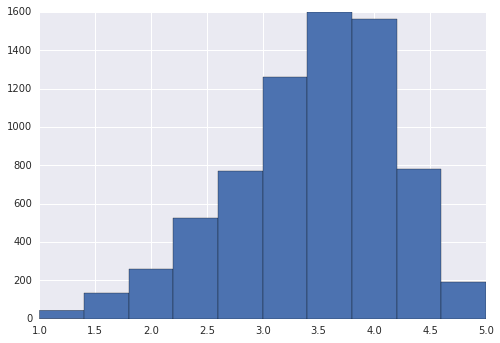

In [5]:
plot.figure()
restaurants['stars'].hist()

In [6]:
restaurants['log_stars'] = restaurants['stars'].apply(lambda stars: log(stars))

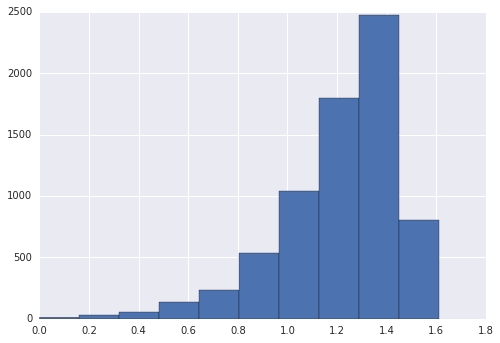

In [7]:
plot.figure()
restaurants['log_stars'].hist()

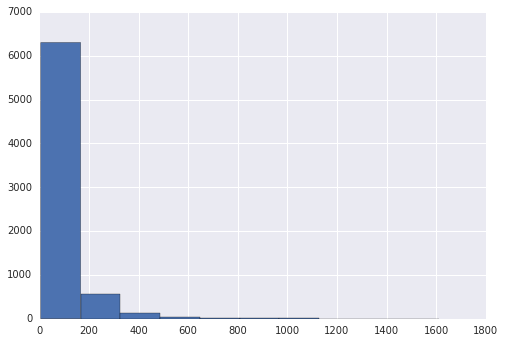

In [8]:
plot.figure()
restaurants['review_count'].hist()

In [9]:
restaurants['log_review_count'] = restaurants['review_count'].apply(lambda count: log(count))

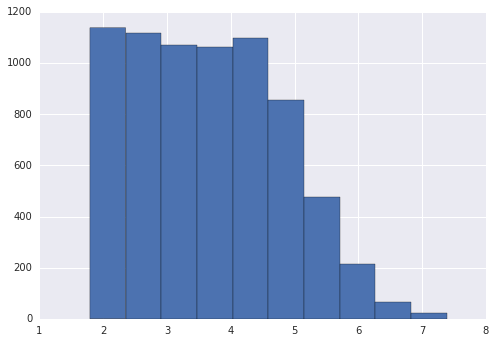

In [10]:
plot.figure()
restaurants['log_review_count'].hist()

## Calculated Predictor Variables

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f26f157e7f0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f267b4d3b38>]], dtype=object)

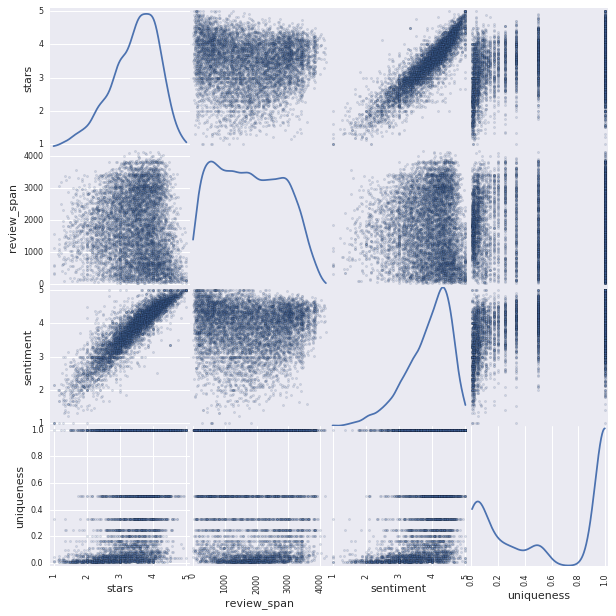

In [11]:
scatter_matrix(restaurants[['stars', 'review_span', 'sentiment', 'uniqueness']], 
               alpha=0.2, 
               diagonal='kde',
               figsize=(10,10)
              )

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f268b12e278>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f26e0875160>]], dtype=object)

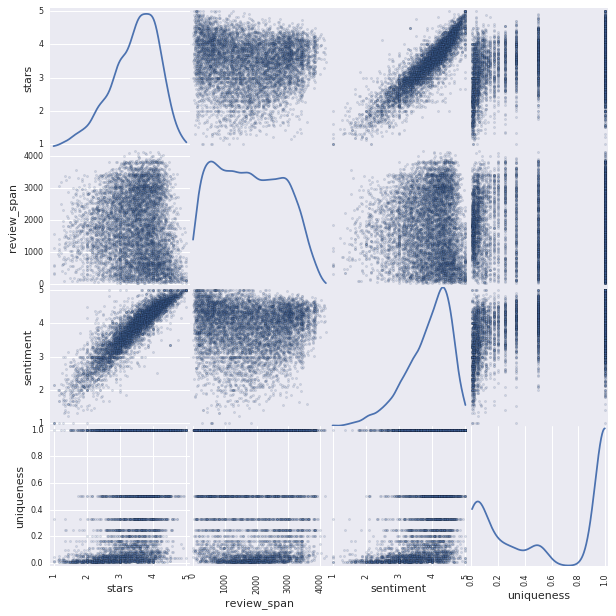

In [12]:
scatter_matrix(restaurants[restaurants['review_count']>MIN_REVIEW_COUNT][['stars', 'review_span', 'sentiment', 'uniqueness']], 
               alpha=0.2, 
               diagonal='kde',
               figsize=(10,10)
              )

### Review Span

/opt/conda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


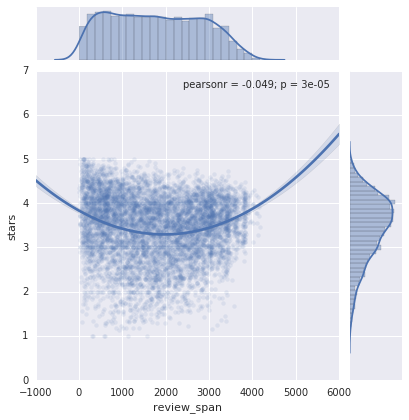

In [13]:
seaborn.jointplot(x='review_span', y='stars',
                  data=restaurants,
                  kind='reg',
                  order=2, 
                  scatter_kws={'alpha':0.1}
                 )

/opt/conda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


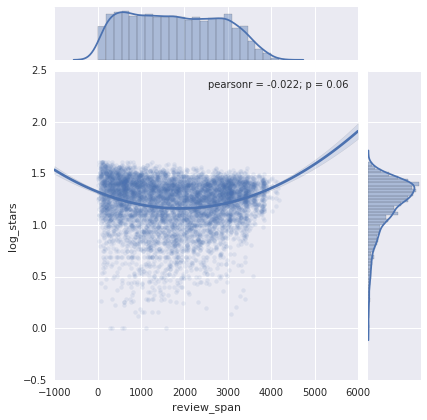

In [14]:
seaborn.jointplot(x='review_span', y='log_stars',
                  data=restaurants[restaurants['review_count']>MIN_REVIEW_COUNT],
                  kind='reg',
                  order=2, 
                  scatter_kws={'alpha':0.1}
                 )

In [15]:
restaurants['log_review_span'] = restaurants['review_span'].apply(lambda span: log(span+1))

/opt/conda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


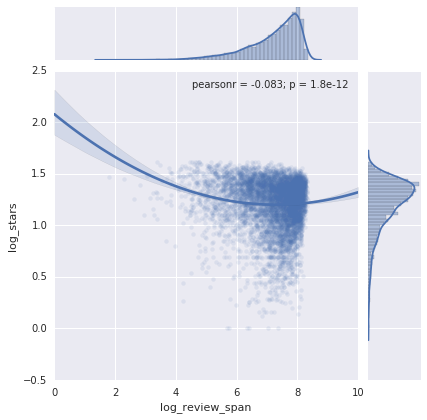

In [16]:
seaborn.jointplot(x='log_review_span', y='log_stars',
                  data=restaurants[restaurants['review_count']>MIN_REVIEW_COUNT],
                  kind='reg',
                  order=2, 
                  scatter_kws={'alpha':0.1}
                 )

/opt/conda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


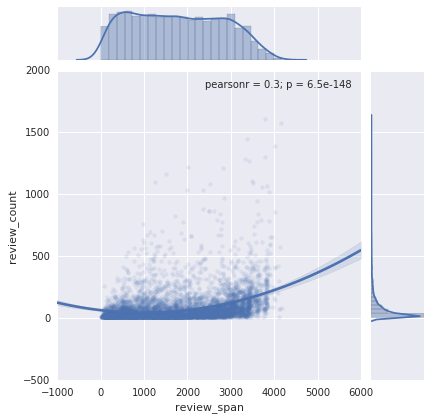

In [17]:
seaborn.jointplot(x='review_span', y='review_count',
                  data=restaurants,
                  kind='reg',
                  order=2, 
                  scatter_kws={'alpha':0.1}
                 )

### Review Count

/opt/conda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


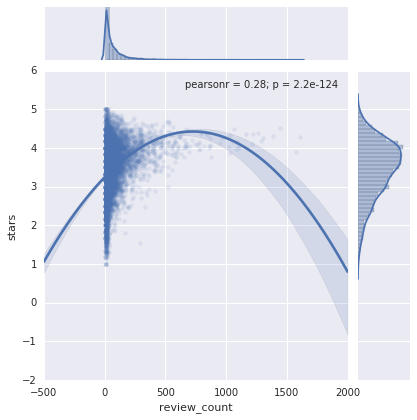

In [18]:
seaborn.jointplot(x='review_count', y='stars',
                  data=restaurants,
                  kind='reg',
                  order=2, 
                  scatter_kws={'alpha':0.1}
                 )

In [19]:
restaurants['log_review_count'] = restaurants['review_count'].apply(lambda count: log(count))

/opt/conda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


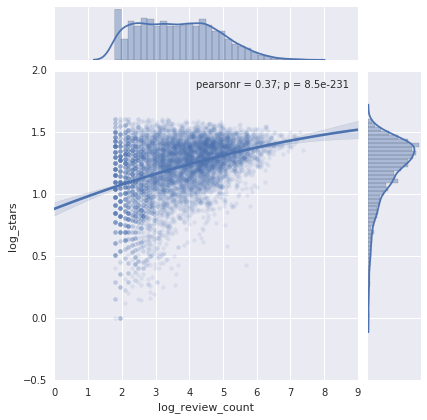

In [20]:
seaborn.jointplot(x='log_review_count', y='log_stars',
                  data=restaurants[restaurants['review_count']>MIN_REVIEW_COUNT],
                  kind='reg',
                  order=2, 
                  scatter_kws={'alpha':0.1}
                 )

### Sentiment

/opt/conda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


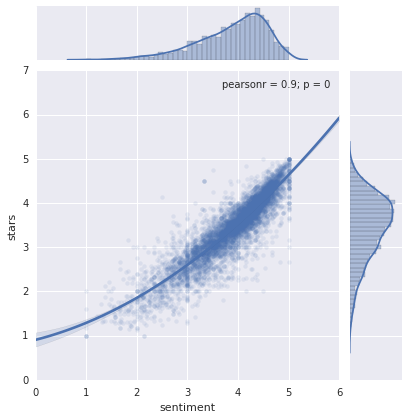

In [21]:
seaborn.jointplot(x='sentiment', y='stars',
                  data=restaurants,
                  kind='reg',
                  order=2, 
                  scatter_kws={'alpha':0.1}
                 )

In [22]:
restaurants['sqrt_sentiment'] = restaurants['sentiment']**.5

/opt/conda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


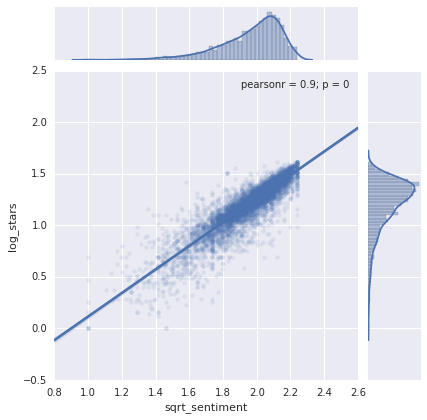

In [23]:
seaborn.jointplot(x='sqrt_sentiment', y='log_stars',
                  data=restaurants[restaurants['review_count']>MIN_REVIEW_COUNT],
                  kind='reg',
                  order=1, 
                  scatter_kws={'alpha':0.1}
                 )

### Uniqueness

/opt/conda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


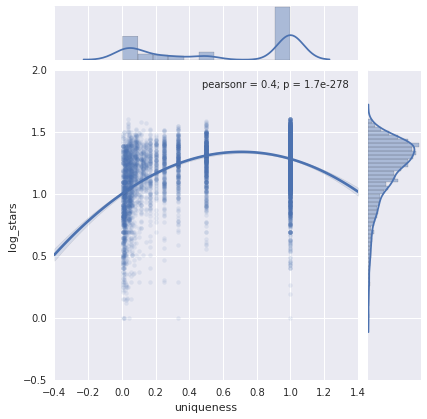

In [24]:
seaborn.jointplot(x='uniqueness', y='log_stars',
                  data=restaurants,
                  kind='reg',
                  order=2, 
                  scatter_kws={'alpha':0.1}
                 )

In [25]:
restaurants['sq_log_uniqueness'] = (restaurants['uniqueness'].apply(lambda score: log(score)**2))

/opt/conda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


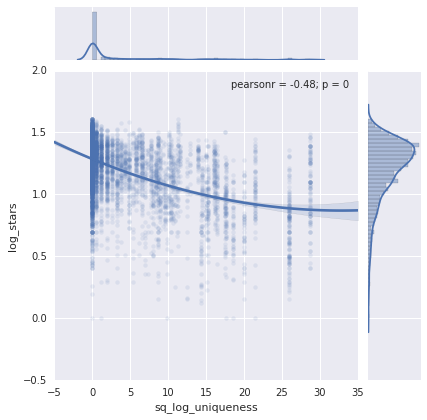

In [26]:
seaborn.jointplot(x='sq_log_uniqueness', y='log_stars',
                  data=restaurants[restaurants['review_count']>MIN_REVIEW_COUNT],
                  kind='reg',
                  order=2, 
                  scatter_kws={'alpha':0.1}
                 )

## Spatial Predictor Variables

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f26e1333630>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f267051b978>]], dtype=object)

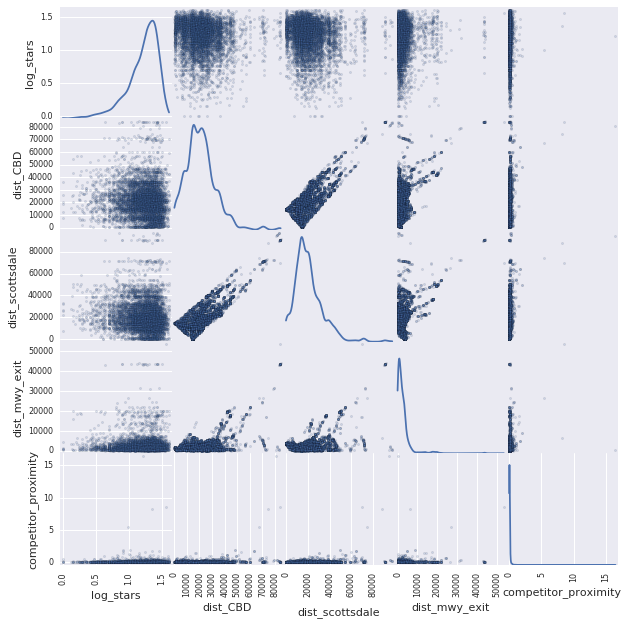

In [27]:
scatter_matrix(restaurants[['log_stars', 'dist_CBD', 'dist_scottsdale', 'dist_mwy_exit',
       'competitor_proximity']], 
               alpha=0.2, 
               diagonal='kde',
               figsize=(10,10)
              )

### Distance from CBD

/opt/conda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


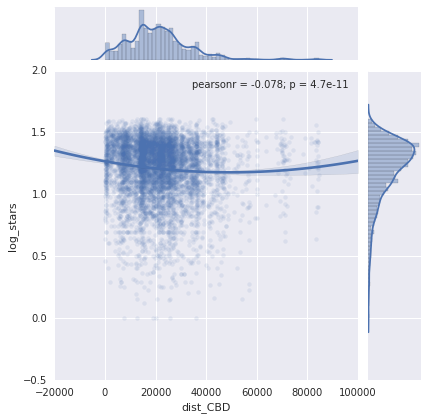

In [28]:
seaborn.jointplot(x='dist_CBD', y='log_stars',
                  data=restaurants,
                  kind='reg',
                  order=2, 
                  scatter_kws={'alpha':0.1}
                 )

In [29]:
restaurants['sqrt_dist_CBD'] = restaurants['dist_CBD']**0.5

/opt/conda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


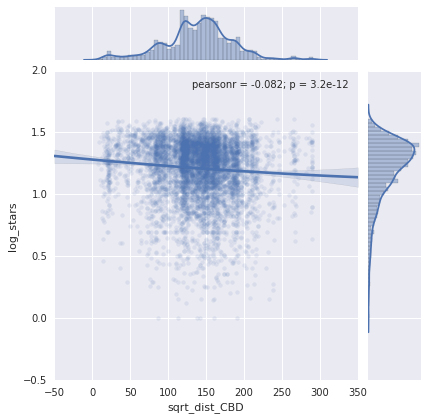

In [30]:
seaborn.jointplot(x='sqrt_dist_CBD', y='log_stars',
                  data=restaurants[restaurants['review_count']>MIN_REVIEW_COUNT],
                  kind='reg',
                  order=2, 
                  scatter_kws={'alpha':0.1}
                 )

### Distance from Scottsdale Shopping

/opt/conda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


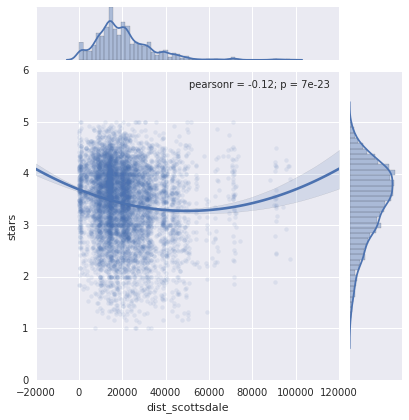

In [31]:
seaborn.jointplot(x='dist_scottsdale', y='stars',
                  data=restaurants,
                  kind='reg',
                  order=2, 
                  scatter_kws={'alpha':0.1}
                 )

In [32]:
restaurants['sqrt_dist_scottsdale'] = restaurants['dist_scottsdale']**0.5

/opt/conda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


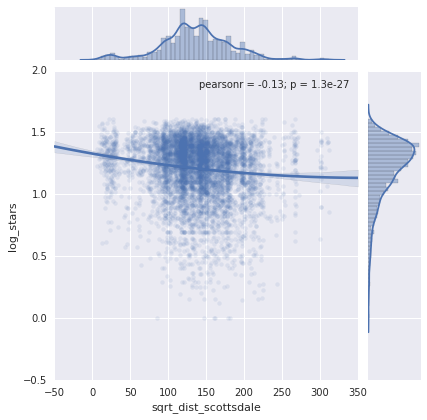

In [33]:
seaborn.jointplot(x='sqrt_dist_scottsdale', y='log_stars',
                  data=restaurants[restaurants['review_count']>MIN_REVIEW_COUNT],
                  kind='reg',
                  order=2, 
                  scatter_kws={'alpha':0.1}
                 )

### Proximity of Competitors (within market area)

/opt/conda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


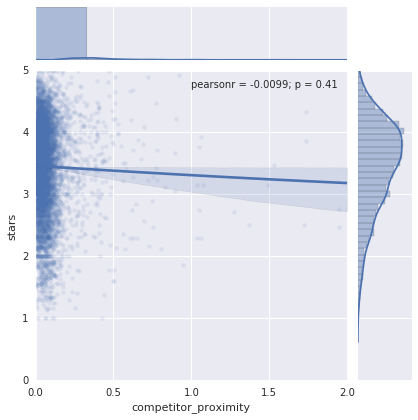

In [34]:
seaborn.jointplot(x='competitor_proximity', y='stars',
                  data=restaurants,
                  kind='reg',
                  order=2,
                  xlim=(0,2),
                  ylim=(0,5),
                  scatter_kws={'alpha':0.1},
                 )

In [35]:
restaurants['sqrt_log_competitor_proximity'] = restaurants['competitor_proximity'].apply(lambda score: log(score + 1)**.5)

/opt/conda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


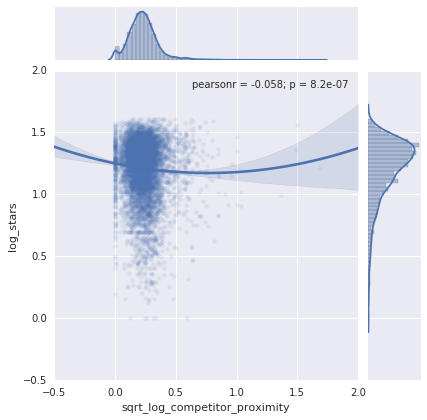

In [36]:
seaborn.jointplot(x='sqrt_log_competitor_proximity', y='log_stars',
                  data=restaurants[restaurants['review_count']>MIN_REVIEW_COUNT],
                  kind='reg',
                  order=2,
                  
                  scatter_kws={'alpha':0.1},
                 )

### Distance from Nearest Motorway Exit

/opt/conda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


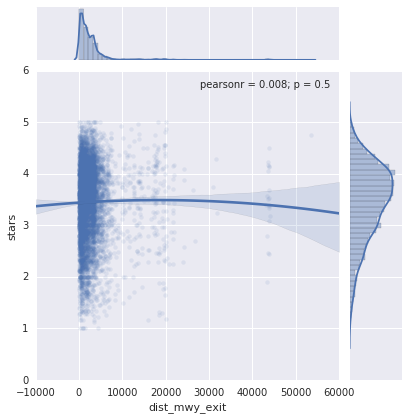

In [37]:
seaborn.jointplot(x='dist_mwy_exit', y='stars',
                  data=restaurants,
                  kind='reg',
                  order=2, 
                  scatter_kws={'alpha':0.1}
                 )

In [38]:
restaurants['sqrt_dist_mwy_exit'] = restaurants['dist_mwy_exit']**.5

/opt/conda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


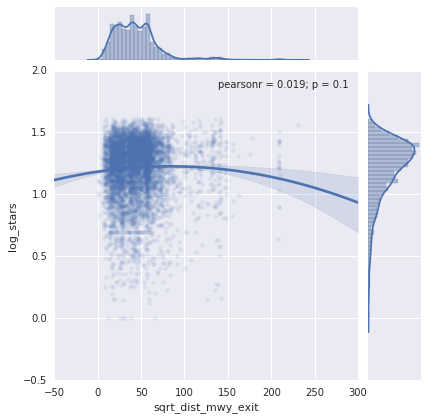

In [39]:
seaborn.jointplot(x='sqrt_dist_mwy_exit', y='log_stars',
                  data=restaurants[restaurants['review_count']>MIN_REVIEW_COUNT],
                  kind='reg',
                  order=2, 
                  scatter_kws={'alpha':0.1}
                 )

## Demographic Predictor Variables

### Age & Population

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f26e6f46da0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f26338a99b0>]], dtype=object)

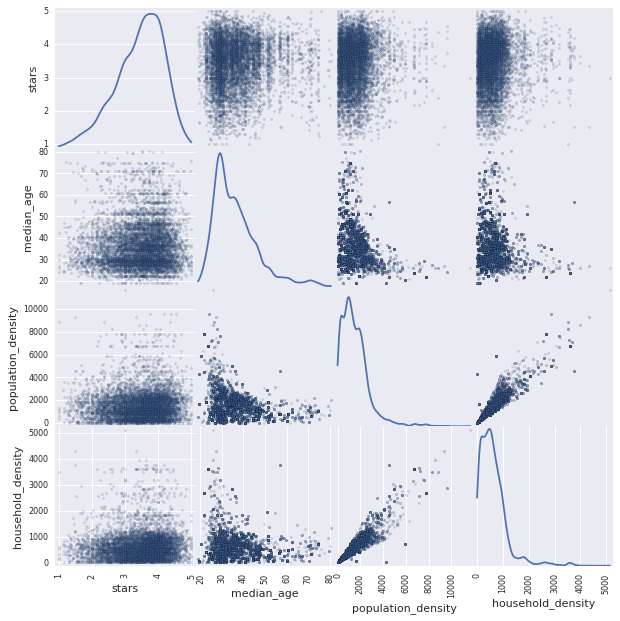

In [40]:
scatter_matrix(restaurants[['stars', 'median_age', 'population_density', 'household_density']], 
               alpha=0.2, 
               diagonal='kde',
               figsize=(10,10)
              )

In [41]:
restaurants[['log_median_age', 'log_population_density', 'log_household_density']] = \
    (restaurants[['median_age', 'population_density', 'household_density']]
     .applymap(lambda value: log(value + 1))
    ) 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2647766940>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f26686e40b8>]], dtype=object)

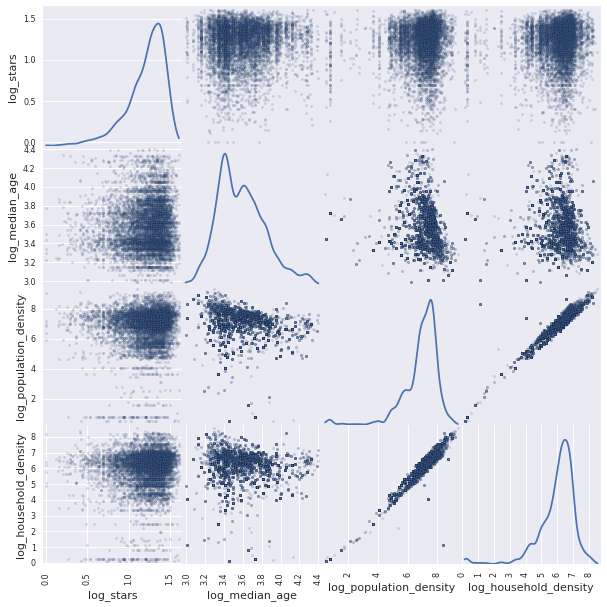

In [42]:
scatter_matrix(restaurants[restaurants['review_count']>MIN_REVIEW_COUNT][['log_stars', 'log_median_age', 'log_population_density', 'log_household_density']], 
               alpha=0.2, 
               diagonal='kde',
               figsize=(10,10)
              )

#### Median Age

/opt/conda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


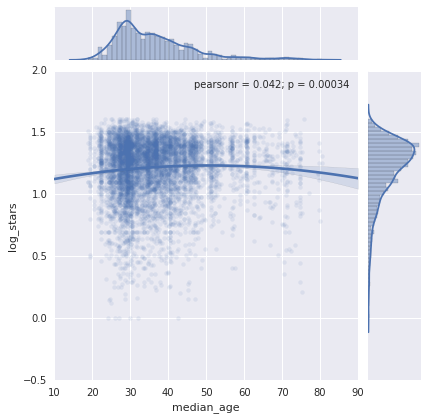

In [43]:
seaborn.jointplot(x='median_age', y='log_stars',
                  data=restaurants[restaurants['review_count']>MIN_REVIEW_COUNT],
                  kind='reg',
                  order=2, 
                  scatter_kws={'alpha':0.1}
                 )

/opt/conda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


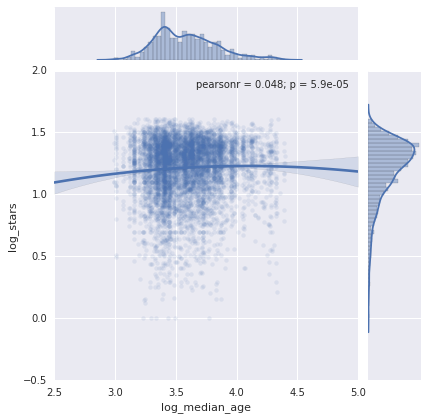

In [44]:
seaborn.jointplot(x='log_median_age', y='log_stars',
                  data=restaurants[restaurants['review_count']>MIN_REVIEW_COUNT],
                  kind='reg',
                  order=2, 
                  scatter_kws={'alpha':0.1}
                 )

#### Population Density

/opt/conda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


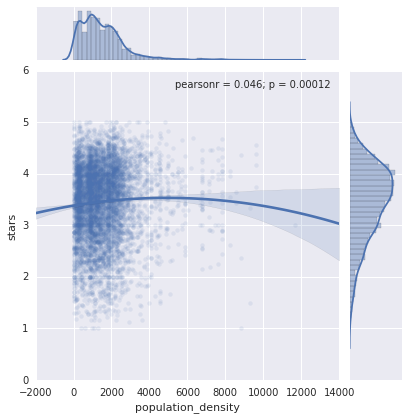

In [45]:
seaborn.jointplot(x='population_density', y='stars',
                  data=restaurants,
                  kind='reg',
                  order=2, 
                  scatter_kws={'alpha':0.1}
                 )

/opt/conda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


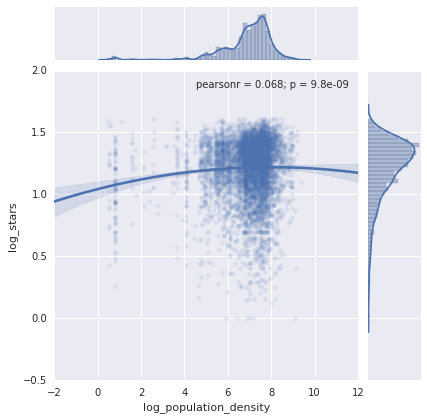

In [46]:
seaborn.jointplot(x='log_population_density', y='log_stars',
                  data=restaurants[restaurants['review_count']>MIN_REVIEW_COUNT],
                  kind='reg',
                  order=2, 
                  scatter_kws={'alpha':0.1}
                 )

### Home Ownership, Renters

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f26e439d940>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f26f44ca0b8>]], dtype=object)

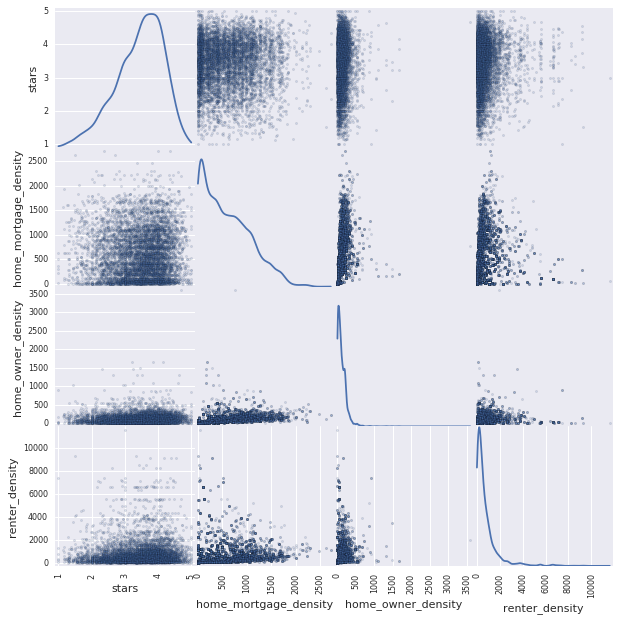

In [47]:
scatter_matrix(restaurants[['stars', 'home_mortgage_density', 'home_owner_density', 'renter_density']], 
               alpha=0.2, 
               diagonal='kde',
               figsize=(10,10)
              )

In [48]:
restaurants[['log_home_mortgage_density', 'log_home_owner_density', 'log_renter_density']] = \
    (restaurants[['home_mortgage_density', 'home_owner_density', 'renter_density']]
     .applymap(lambda value: log(value + 1))
    ) 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f26f4398320>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f26f3e7a438>]], dtype=object)

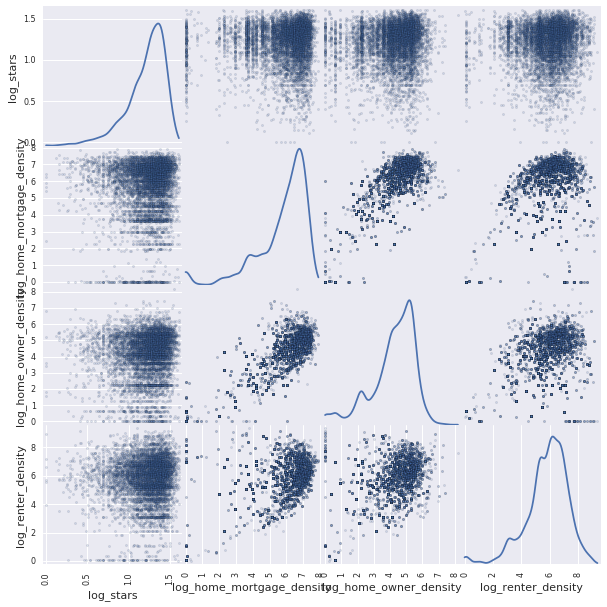

In [49]:
scatter_matrix(restaurants[['log_stars', 'log_home_mortgage_density', 'log_home_owner_density', 'log_renter_density']], 
               alpha=0.2, 
               diagonal='kde',
               figsize=(10,10)
              )

### Household Size, Type

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f26f3ce9e10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f26f38475f8>]], dtype=object)

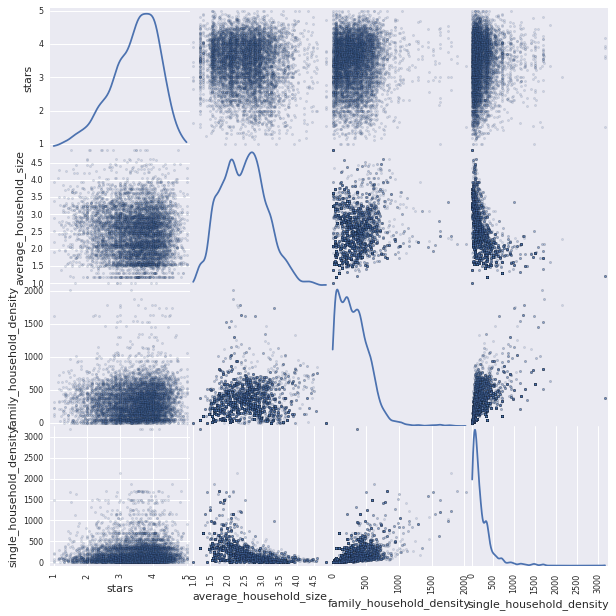

In [50]:
scatter_matrix(restaurants[['stars', 'average_household_size', 'family_household_density', 'single_household_density']], 
               alpha=0.2, 
               diagonal='kde',
               figsize=(10,10)
              )

In [51]:
restaurants[['log_average_household_size', 'log_family_household_density', 'log_single_household_density']] = \
    (restaurants[['average_household_size', 'family_household_density', 'single_household_density']]
     .applymap(lambda value: log(value + 1))
    ) 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f26f3716080>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f26f32eac88>]], dtype=object)

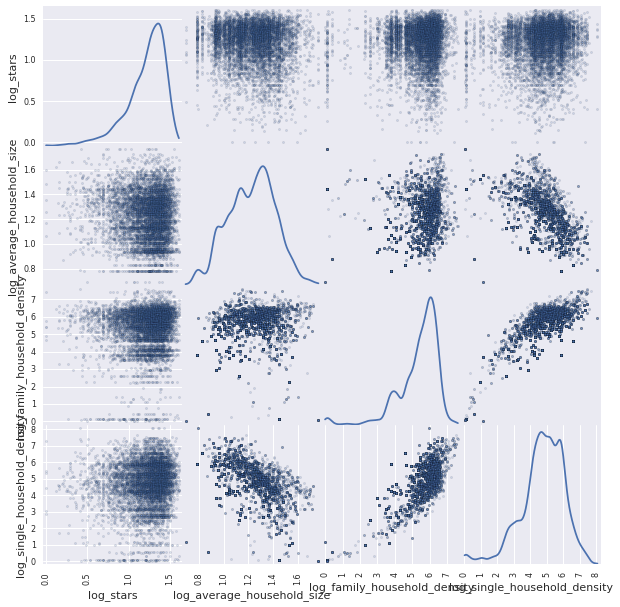

In [52]:
scatter_matrix(restaurants[['log_stars', 'log_average_household_size', 'log_family_household_density', 'log_single_household_density']], 
               alpha=0.2, 
               diagonal='kde',
               figsize=(10,10)
              )

### Race & Ethnicity

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f26f31dac50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f26f170cf98>]], dtype=object)

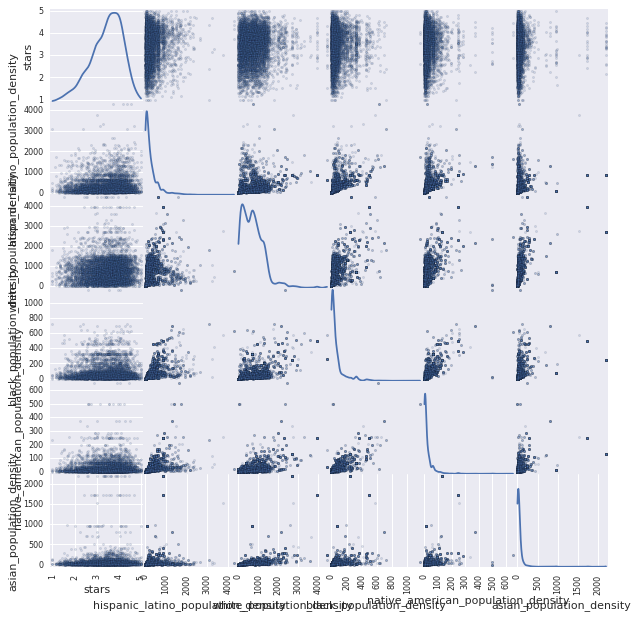

In [53]:
scatter_matrix(restaurants[['stars', 'hispanic_latino_population_density', 'white_population_density', 
                            'black_population_density', 'native_american_population_density', 
                            'asian_population_density'
                           ]], 
               alpha=0.2, 
               diagonal='kde',
               figsize=(10,10)
              )

In [54]:
restaurants[['log_hispanic_latino_population_density', 'log_white_population_density', 
                  'log_black_population_density', 'log_native_american_population_density', 
                  'log_asian_population_density']
           ] = \
    (restaurants[['hispanic_latino_population_density', 'white_population_density', 
                  'black_population_density', 'native_american_population_density', 
                  'asian_population_density'
                 ]]
     .applymap(lambda value: log(value + 1))
    ) 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f26f140dac8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f26f015d588>]], dtype=object)

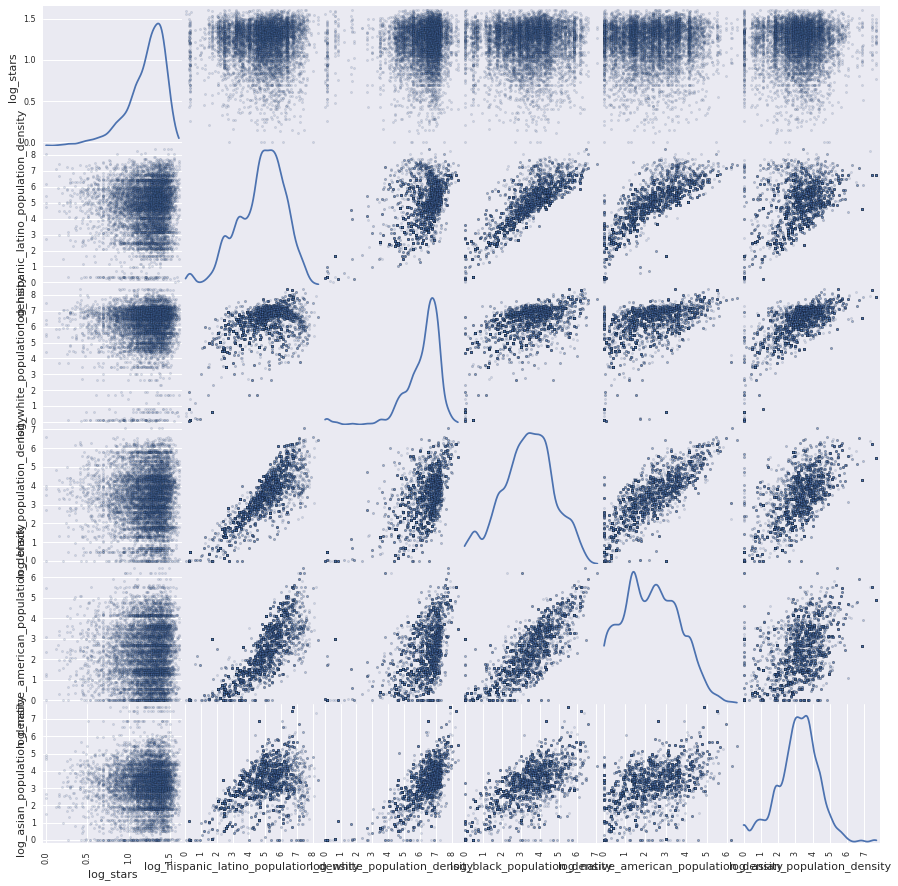

In [55]:
scatter_matrix(restaurants[['log_stars', 'log_hispanic_latino_population_density', 'log_white_population_density', 
                            'log_black_population_density', 'log_native_american_population_density', 
                            'log_asian_population_density'
                           ]], 
               alpha=0.2, 
               diagonal='kde',
               figsize=(15,15)
              )

### Wealth & Income

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f26f140d9e8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f26efac8860>]], dtype=object)

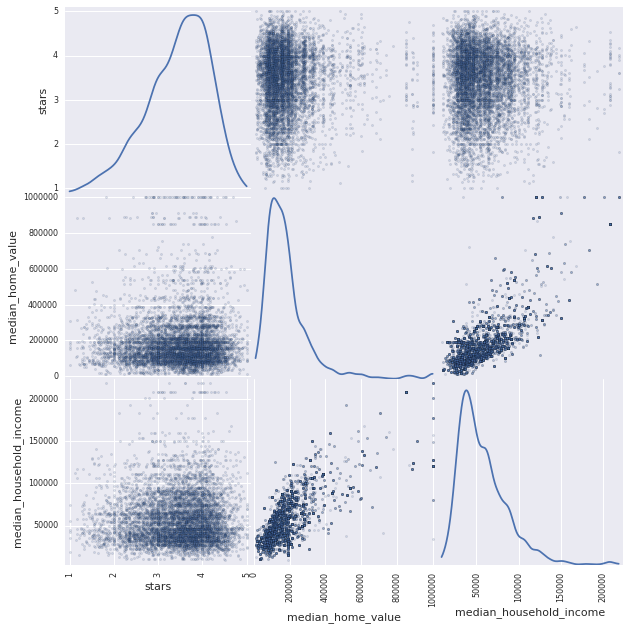

In [56]:
scatter_matrix(restaurants[['stars', 'median_home_value', 'median_household_income']
                          ], 
               alpha=0.2, 
               diagonal='kde',
               figsize=(10,10)
              )

In [57]:
restaurants[['log_median_home_value', 'log_median_household_income']] = \
    (restaurants[['median_home_value', 'median_household_income']]
     .applymap(lambda value: log(value + 1))
    ) 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f26ef9aff60>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f26ef75cb70>]], dtype=object)

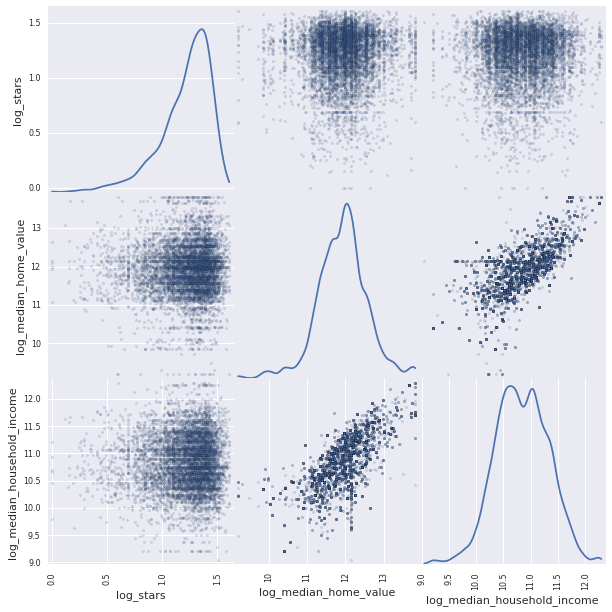

In [58]:
scatter_matrix(restaurants[['log_stars', 'log_median_home_value', 'log_median_household_income']], 
               alpha=0.2, 
               diagonal='kde',
               figsize=(10,10)
              )

/opt/conda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


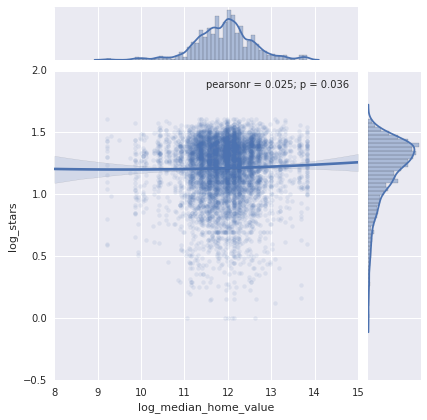

In [59]:
seaborn.jointplot(x='log_median_home_value', y='log_stars',
                  data=restaurants[restaurants['review_count']>MIN_REVIEW_COUNT],
                  kind='reg',
                  order=2, 
                  scatter_kws={'alpha':0.1}
                 )

/opt/conda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


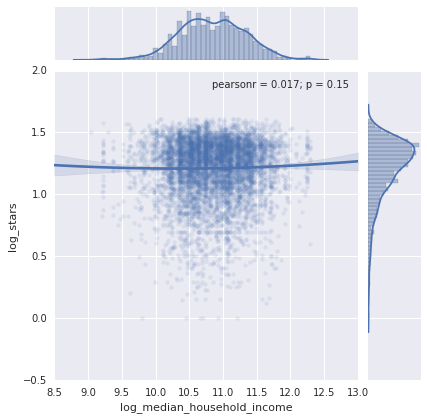

In [60]:
seaborn.jointplot(x='log_median_household_income', y='log_stars',
                  data=restaurants[restaurants['review_count']>MIN_REVIEW_COUNT],
                  kind='reg',
                  order=2, 
                  scatter_kws={'alpha':0.1}
                 )

### Education

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f26ee08a780>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f26ed408ef0>]], dtype=object)

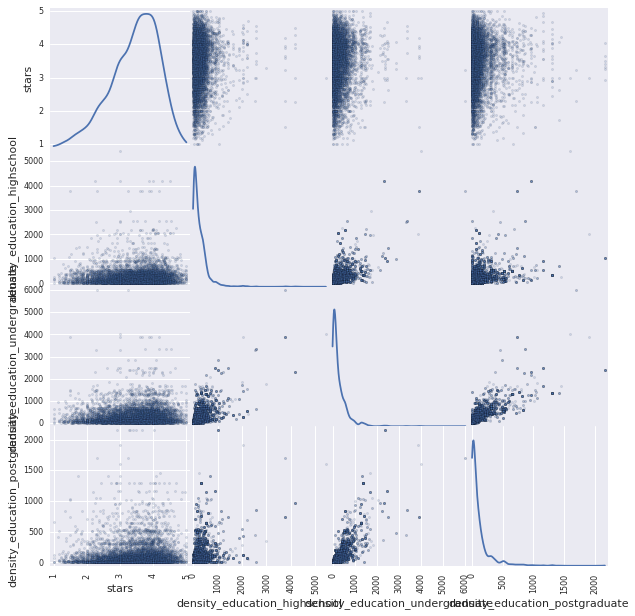

In [61]:
scatter_matrix(restaurants[['stars', 'density_education_highschool', 'density_education_undergraduate',
       'density_education_postgraduate']], 
               alpha=0.2, 
               diagonal='kde',
               figsize=(10,10)
              )

In [62]:
restaurants[['log_density_education_highschool', 'log_density_education_undergraduate',
       'log_density_education_postgraduate']] = \
    (restaurants[['density_education_highschool', 'density_education_undergraduate',
       'density_education_postgraduate']]
     .applymap(lambda value: log(value + 1))
    ) 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f26ed2a8518>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f26ece1cda0>]], dtype=object)

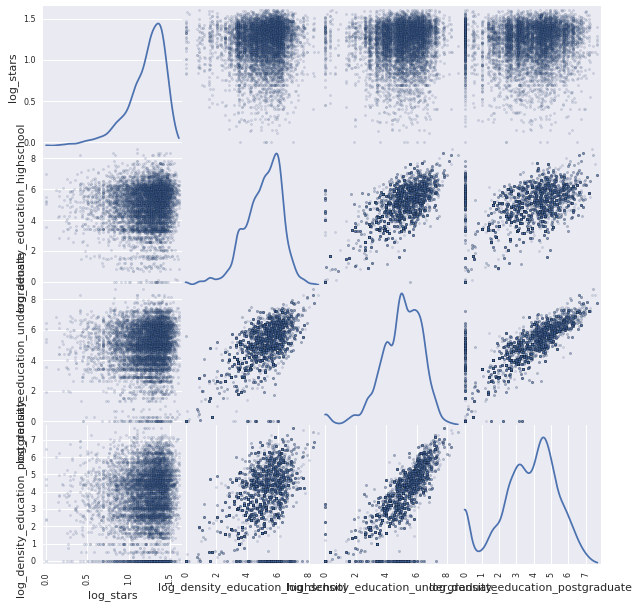

In [63]:
scatter_matrix(restaurants[['log_stars', 'log_density_education_highschool', 'log_density_education_undergraduate',
       'log_density_education_postgraduate']], 
               alpha=0.2, 
               diagonal='kde',
               figsize=(10,10)
              )

## Restaurant Attribute Predictor Variables

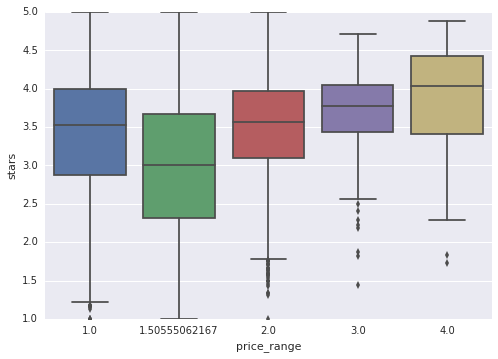

In [64]:
seaborn.boxplot(restaurants['price_range'], restaurants['stars'])

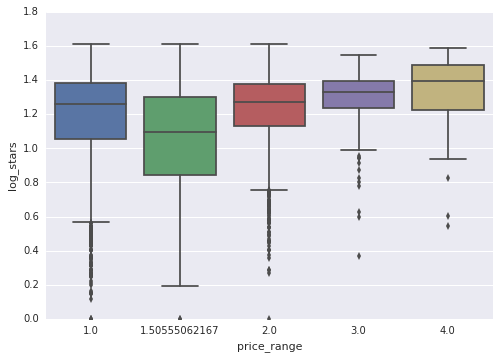

In [65]:
seaborn.boxplot(restaurants['price_range'], restaurants['log_stars'])

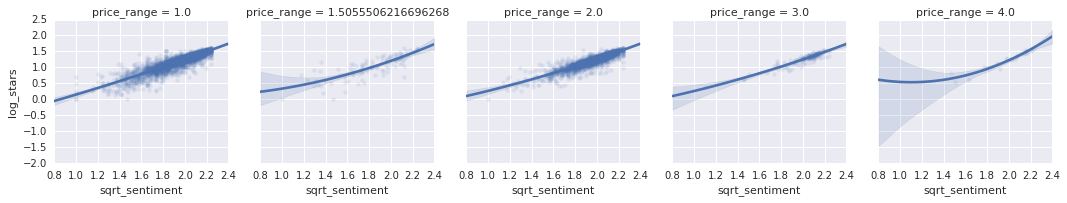

In [66]:
grid = seaborn.FacetGrid(data=restaurants[restaurants['review_count']>MIN_REVIEW_COUNT], 
                         col='price_range'
                        )
grid.map(seaborn.regplot, 
         'sqrt_sentiment', 
         'log_stars',
         order=2, 
         scatter_kws={'alpha':0.1}
        )

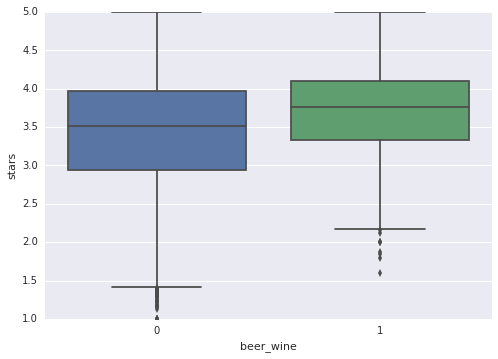

In [67]:
seaborn.boxplot(restaurants['beer_wine'], restaurants['stars'])

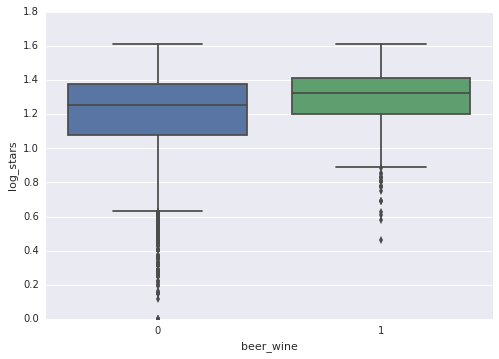

In [68]:
seaborn.boxplot(restaurants['beer_wine'], restaurants['log_stars'])

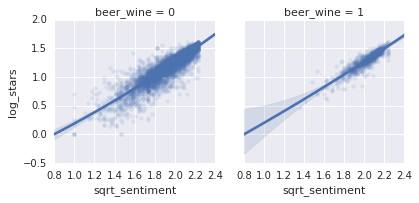

In [69]:
grid = seaborn.FacetGrid(data=restaurants[restaurants['review_count']>MIN_REVIEW_COUNT], 
                         col='beer_wine'
                        )
grid.map(seaborn.regplot, 
         'sqrt_sentiment', 
         'log_stars',
         order=2, 
         scatter_kws={'alpha':0.1}
        )

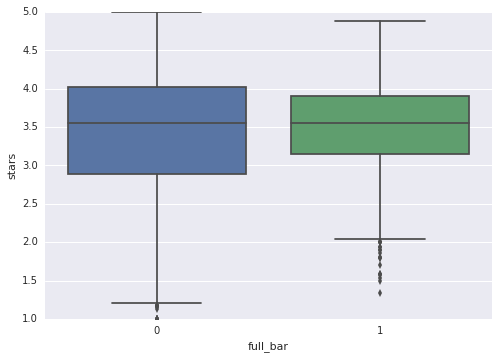

In [70]:
seaborn.boxplot(restaurants['full_bar'], restaurants['stars'])

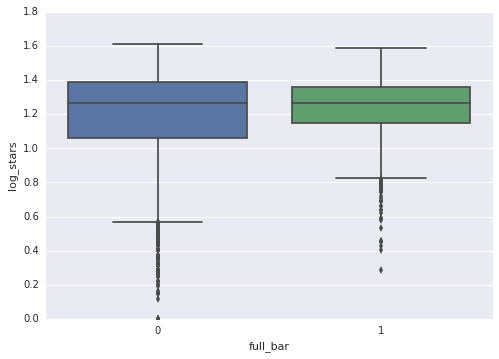

In [71]:
seaborn.boxplot(restaurants['full_bar'], restaurants['log_stars'])

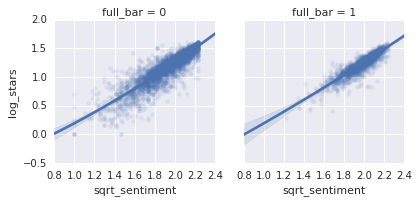

In [72]:
grid = seaborn.FacetGrid(data=restaurants[restaurants['review_count']>MIN_REVIEW_COUNT], 
                         col='full_bar'
                        )
grid.map(seaborn.regplot, 
         'sqrt_sentiment', 
         'log_stars',
         order=2, 
         scatter_kws={'alpha':0.1}
        )

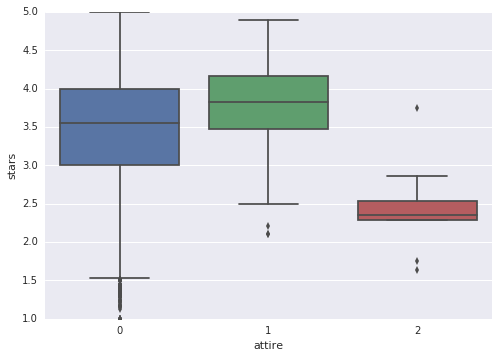

In [73]:
seaborn.boxplot(restaurants['attire'], restaurants['stars'])

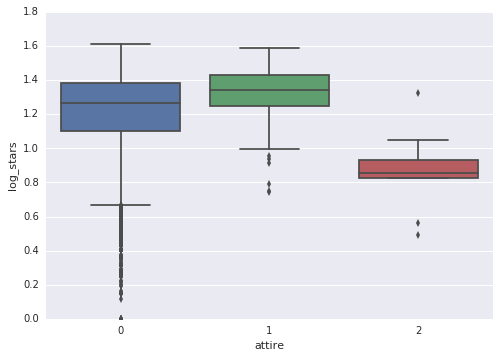

In [74]:
seaborn.boxplot(restaurants['attire'], restaurants['log_stars'])

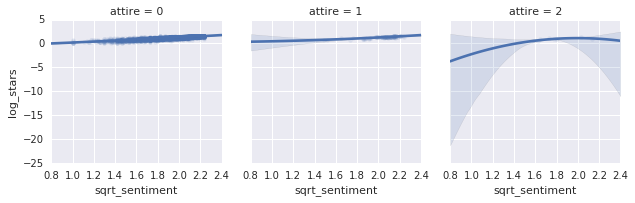

In [75]:
grid = seaborn.FacetGrid(data=restaurants[restaurants['review_count']>MIN_REVIEW_COUNT], 
                         col='attire'
                        )
grid.map(seaborn.regplot, 
         'sqrt_sentiment', 
         'log_stars',
         order=2, 
         scatter_kws={'alpha':0.1}
        )

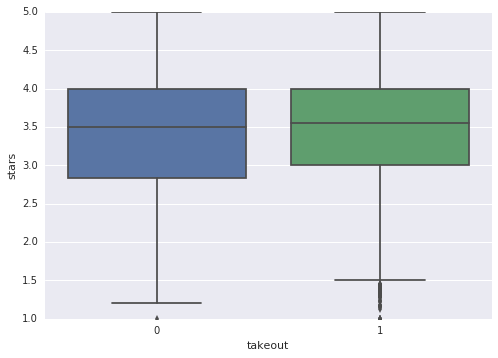

In [76]:
seaborn.boxplot(restaurants['takeout'], restaurants['stars'])

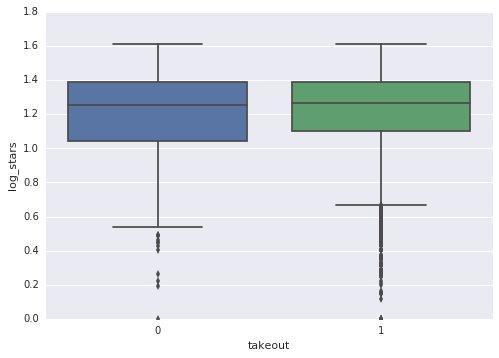

In [77]:
seaborn.boxplot(restaurants['takeout'], restaurants['log_stars'])

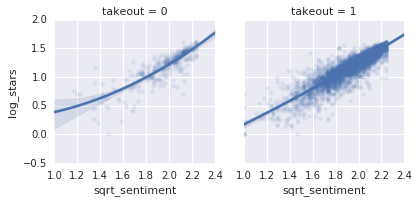

In [78]:
grid = seaborn.FacetGrid(data=restaurants[restaurants['review_count']>MIN_REVIEW_COUNT], 
                         col='takeout'
                        )
grid.map(seaborn.regplot, 
         'sqrt_sentiment', 
         'log_stars',
         order=2, 
         scatter_kws={'alpha':0.1}
        )

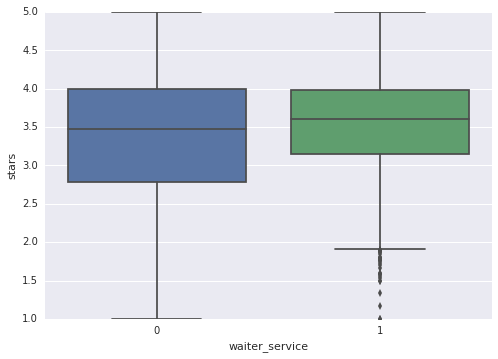

In [79]:
seaborn.boxplot(restaurants['waiter_service'], restaurants['stars'])

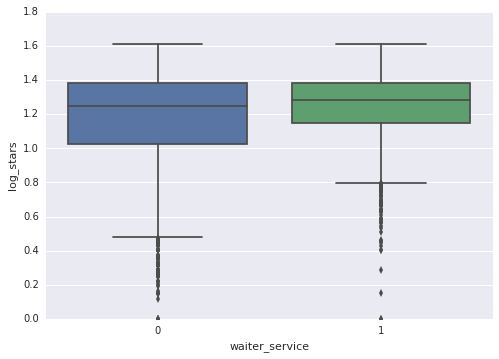

In [80]:
seaborn.boxplot(restaurants['waiter_service'], restaurants['log_stars'])

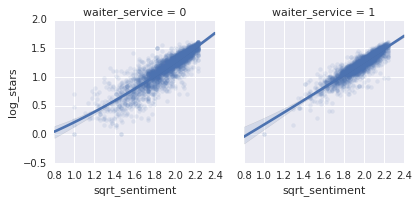

In [81]:
grid = seaborn.FacetGrid(data=restaurants[restaurants['review_count']>MIN_REVIEW_COUNT], 
                         col='waiter_service'
                        )
grid.map(seaborn.regplot, 
         'sqrt_sentiment', 
         'log_stars',
         order=2, 
         scatter_kws={'alpha':0.1}
        )

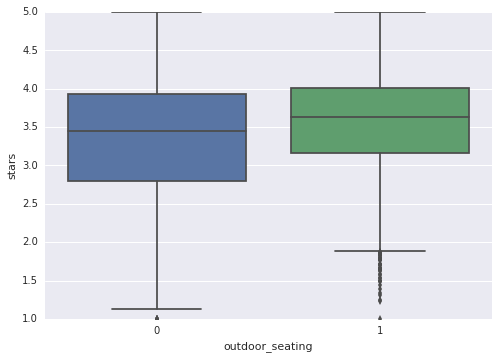

In [82]:
seaborn.boxplot(restaurants['outdoor_seating'], restaurants['stars'])

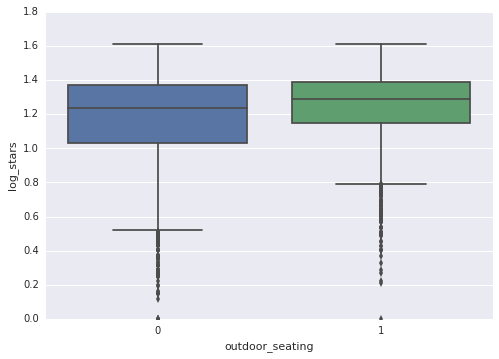

In [83]:
seaborn.boxplot(restaurants['outdoor_seating'], restaurants['log_stars'])

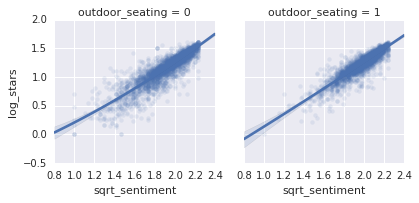

In [84]:
grid = seaborn.FacetGrid(data=restaurants[restaurants['review_count']>MIN_REVIEW_COUNT], 
                         col='outdoor_seating'
                        )
grid.map(seaborn.regplot, 
         'sqrt_sentiment', 
         'log_stars',
         order=2, 
         scatter_kws={'alpha':0.1}
        )

## Rebuild dataframe with transformed candidates

In [85]:
# these variables were be included in the output file
restaurants = restaurants[['business_id', 'log_median_age', 'log_average_household_size',
       'log_population_density', 'log_home_mortgage_density', 'log_home_owner_density',
       'log_renter_density', 'log_household_density', 'log_family_household_density',
       'log_single_household_density', 'log_hispanic_latino_population_density',
       'log_white_population_density', 'log_black_population_density',
       'log_native_american_population_density', 'log_asian_population_density',
       'log_median_home_value', 'log_median_household_income',
       'log_density_education_highschool', 'log_density_education_undergraduate',
       'log_density_education_postgraduate', 'full_address', 'name', 'beer_wine',
       'full_bar', 'price_range', 'attire', 'takeout', 'waiter_service',
       'outdoor_seating', 'sq_log_uniqueness', 'review_span', 'log_review_count', 'log_stars',
       'sqrt_sentiment', 'geometry', 'sqrt_dist_CBD', 'sqrt_dist_scottsdale',
       'sqrt_dist_mwy_exit', 'nearest_neighbor_distance', 'sqrt_log_competitor_proximity']]

## Save Data

In [87]:
# shorten names for ESRI compatability
restaurants.rename(columns={'business_id': 'bus_id', 
                            'log_median_age' : 'ln_med_age',
                            'log_average_household_size' : 'ln_av_hsiz',
                            'log_population_density' : 'ln_pop_den', 
                            'log_home_mortgage_density' : 'ln_mortgag', 
                            'log_home_owner_density' : 'ln_hom_own',
                            'log_renter_density' : 'ln_rent_dn', 
                            'log_household_density' : 'ln_hld_den', 
                            'log_family_household_density' : 'ln_fam_den',
                            'log_single_household_density' : 'ln_sgl_den', 
                            'log_hispanic_latino_population_density' : 'ln_his_den',
                            'log_white_population_density' : 'ln_wht_den', 
                            'log_black_population_density' : 'ln_blk_den',
                            'log_native_american_population_density' : 'ln_nam_den', 
                            'log_asian_population_density' : 'ln_asn_den',
                            'log_median_home_value' : 'ln_med_hmv', 
                            'log_median_household_income' : 'ln_men_inc',
                            'log_density_education_highschool' : 'ln_ed_hs', 
                            'log_density_education_undergraduate' : 'ln_ed_ug',
                            'log_density_education_postgraduate' : 'ln_ed_pg',
                            'full_address': 'address', 
                            'name': 'rest_name', 
                            'price_range': 'price_rng', 
                            'waiter_service': 'wait_svc',
                            'outdoor_seating': 'outdr_seat', 
                            'sq_log_uniqueness': 'sq_ln_unqe', 
                            'review_span': 'revw_span',
                            'sqrt_sentiment': 'sqrt_sntmt',
                            'log_review_count': 'ln_rvw_ct', 
                            'sqrt_dist_CBD': 'sqrt_CBD', 
                            'sqrt_dist_scottsdale': 'sqrt_scott', 
                            'sqrt_dist_mwy_exit' : 'sqrt_mwext', 
                            'nearest_neighbor_distance' : 'near_neigh', 
                            'sqrt_log_competitor_proximity' : 'sqrt_ln_co'
                           }, inplace=True
                  )

# save as csv
restaurants.to_csv('../data/restaurants.csv')

# save as shapefile
restaurants.to_file('../data/shapefiles/restaurants/restaurants.shp')